# 1 데이터셋 출처
- pima Indians Diabetes Database |kaggle

## 1.1 데이터 구성
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 2 필요한 라이브러리 로드

In [1]:
# 데이터분석을 위한 Pandas 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
# 구버전 주피터 노트북은 디폴트 설정떄문에 해야함

# 3 데이터셋 로드

In [2]:
!move "C:\Users\BIT-R45\Downloads\새 폴더\diabetes.csv"

지정된 파일을 찾을 수 없습니다.


In [3]:
df=pd.read_csv('file-path/data/diabetes.csv',encoding='cp949')
df.shape

(768, 9)

In [4]:
df.head()
#전부 다 숫자로 되어있어서 따로 전처리가 필요 하지 않을듯.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- 다양한 옵션을 지정하여 모델의 성능을 개선해볼 수도 있지만 feature engineering을 해보겠습니다.
- 수치의 범위가 넓으면 수치형 변수의 조건이 너무 세분화되어 tree가 깊어집니다.
- 샘플의 수가 적으면 오퍼피팅(과적합)이 발생할 가능성이 높습니다.
- 오버피팅이란 모의고사에 너무 익숙해져서 실전시험에서 좋은 결과를 얻지 못하는 현상입니다.
- 그러므로 수치형 데이터를 범주화하여 성능을 높여보겠습니다.
- 이전에 만들었던 노트북을 make a copy하여 처음부터 실행합니다.
- 이전 모델에서 나온 점수를 높여보겠습니다.

 

# ○○수치형 변수를 범주형 변수로 만들기

In [5]:
df['Pregnancies_high']=df['Pregnancies']>6

In [66]:
#  One-Hot-Encoding
# 수치 >> 범주 >> 수치
# 성능이 오히려 떨어질 수도 있다.
df['Age_low'] = df['Age']<30
df['Age_middle']=(df['Age']>=30) & (df['Age']<=60)
df['Age_high'] = df["Age"]>60
df[['Age','Age_low','Age_middle','Age_high']]

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False
...,...,...,...,...
763,63,False,False,True
764,27,True,False,False
765,30,False,True,False
766,47,False,True,False


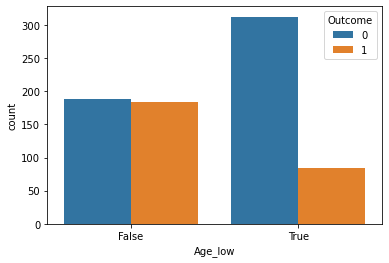

In [67]:
sns.countplot(data=df,x='Age_low',hue='Outcome')

# ○○결측치 다루기

In [143]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
Insulin_nan                 0
dtype: int64

In [144]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_nan
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,156.763021
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,88.802675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,14.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,121.500000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,130.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,206.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,846.000000


In [145]:
df['Insulin_nan'] = df['Insulin'].replace(0,np.nan)
df[['Insulin','Insulin_nan']]

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0
...,...,...
763,180,180.0
764,0,NaN
765,112,112.0
766,0,NaN


In [146]:
df['Insulin_nan'].isnull().sum()

374

In [147]:
# 인슐린 결측치 비율
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [148]:
df.groupby(['Outcome'])['Insulin','Insulin_nan'].agg(['mean','median'])

<ipython-input-148-bceb5b5b0c39>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Outcome'])['Insulin','Insulin_nan'].agg(['mean','median'])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [149]:
# 결측치를 채워주는 여러가지 방법
df.loc[(df['Outcome'] ==1) & (df['Insulin_nan'].isnull()),"Insulin_nan"] = 169.5
df.loc[(df['Outcome'] ==0) & (df['Insulin_nan'].isnull()),"Insulin_nan"] = 102.5


# ○○왜도, 첨도

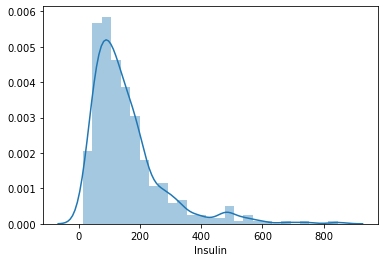

In [170]:
sns.distplot(df.loc[df['Insulin']>0,'Insulin'])

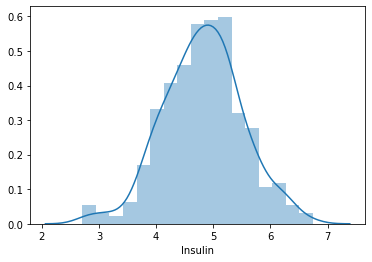

In [172]:
# 데이터가 치우쳐저 있을때 보다 정규분포를 이룰때 머신러닝이나 딥러닝 알고리즘은 더 놓은 성능을 낸다.
sns.distplot(np.log(df.loc[df['Insulin']>0,'Insulin']+1))

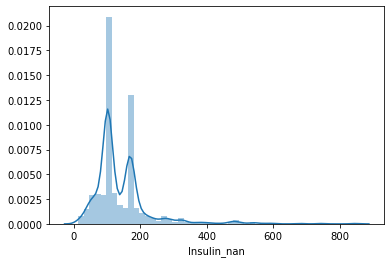

In [173]:
sns.distplot(df['Insulin_nan'])

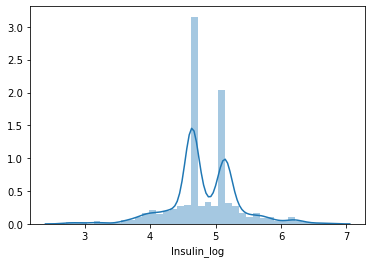

In [174]:
# 마이너스 무한대로 수렴하는 것을 방지하기위해서 +1
df['Insulin_log'] = np.log(df['Insulin_nan']+1)
sns.distplot(df['Insulin_log'])

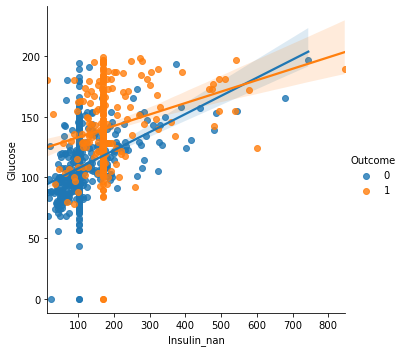

In [198]:
sns.lmplot(data=df, x='Insulin_nan', y='Glucose',hue='Outcome')

In [200]:
df['low_glu_insulin'] = (df['Glucose']<100) & (df['Insulin_nan']<=102.5)
df['low_glu_insulin']

0      False
1       True
2      False
3       True
4      False
       ...  
763    False
764    False
765    False
766    False
767     True
Name: low_glu_insulin, Length: 768, dtype: bool

In [202]:
pd.crosstab(df['Outcome'],df['low_glu_insulin'])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


# 4 학습,예측 데이터셋 나누기

In [203]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 
# split_count 라는 변수에 담습니다.

split_count=int(df.shape[0]*0.8)
split_count

614

In [204]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.

train = df[:split_count].copy()
test = df[split_count:].copy()
test.shape

(154, 16)

# 5 학습,예측에 사용할 컬럼

In [205]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names=train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_nan')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_log',
 'low_glu_insulin']

# 6 정답값이자 예측해야 될 값

In [206]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name='Outcome'
label_name

'Outcome'

# 7 학습,예측 데이터셋 만들기

In [207]:
# 학습 세트 만들기 ex) 시험의 기출문제

x_train = train[feature_names]
print(x_train.shape)
x_train.head()

(614, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log,low_glu_insulin
0,148,72,35,33.6,0.627,50,False,5.138735,False
1,85,66,29,26.6,0.351,31,False,4.639572,True
2,183,64,0,23.3,0.672,32,True,5.138735,False
3,89,66,23,28.1,0.167,21,False,4.553877,True
4,137,40,35,43.1,2.288,33,False,5.129899,False


In [208]:
# 정답 값을 만들어 줍니다. ex) 기출문제의 정답
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [209]:
# 예측에 사용할 데이터세트를 만듭니다. ex) 실전 시험문제

x_test = test[feature_names]
print(x_test.shape)
x_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log,low_glu_insulin
614,138,74,26,36.1,0.557,50,True,4.976734,False
615,106,72,0,25.8,0.207,27,False,4.639572,False
616,117,96,0,28.7,0.157,30,False,4.639572,False
617,68,62,13,20.1,0.257,23,False,2.772589,True
618,112,82,24,28.2,1.282,50,True,5.138735,False


In [210]:
# 예측의 정답값 ex)실전 시험 문제의 정답
# 데이터세트와 정답값은 행의 크기가 일치해야한다.
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 8 머신러닝 알고리즘 가져오기

In [211]:
# 당뇨병 인지 아닌지 분류 하는거 이기 때문에 Classifier 사용
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

# 9 학습(훈련)
- 시험을 볼 때 기출문제(x_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [212]:
# model.fit?
# 결측치가 들어있으면 머신러닝 알고리즘이 학습을 할 수 없음.
model.fit(x_train,y_train)

DecisionTreeClassifier()

# 10 예측
- 실전 시험문제(x_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [213]:
y_predict = model.predict(x_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

# 11 트리 알고리즘 분석하기
- 의사결정나무를 시각화 합니다.

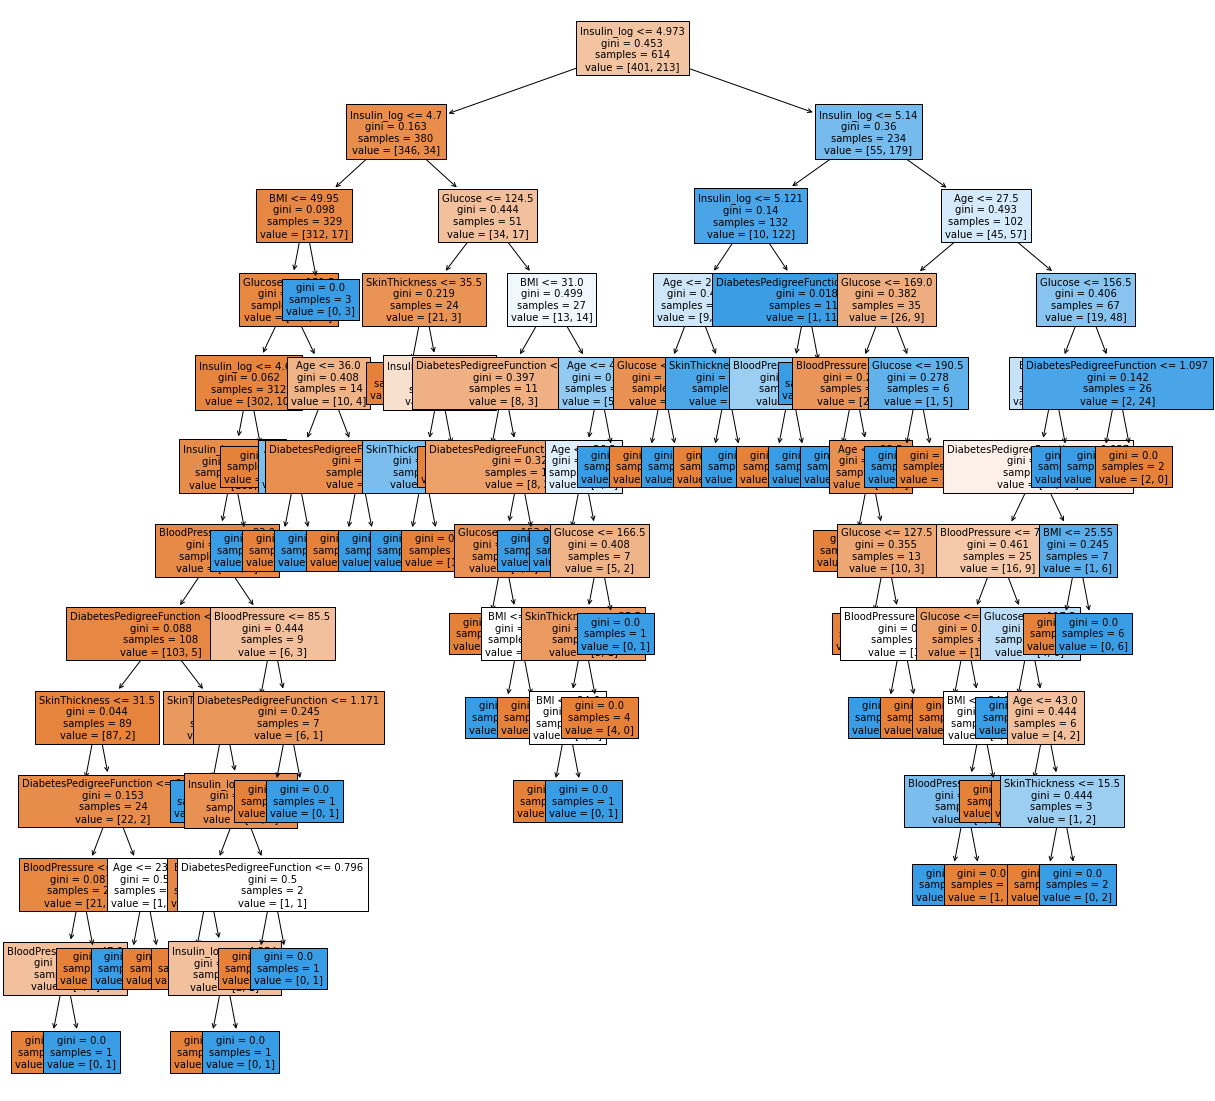

In [214]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)
# 글루코스가 가장 좋은 조건
# 지니계수가 0이되면 당뇨병이다 아니다 판단하게됨.
# 오버피팅(과적합)을 방지하기위해 트리의 깊이를 제한 하기도 함.

In [215]:
# 피처의 중요도를 추출하기
# 피처의 순서에 따라서 중요도 알려줌
model.feature_importances_

array([0.09006682, 0.0533987 , 0.03197232, 0.06257444, 0.05562606,
       0.09841427, 0.        , 0.60794738, 0.        ])

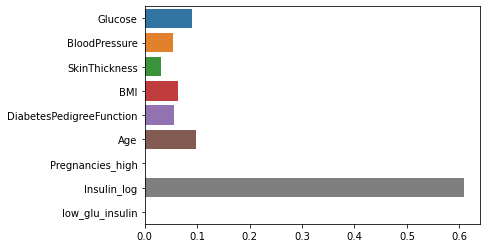

In [221]:
# 피처의 중요도 시각화하기
# 생각외로 인슐린 수치가 당뇨병에 큰 중요도가 있진 않았음.
sns.barplot(x=model.feature_importances_,y=feature_names)

# 12 정확도(Accuracy) 측정하기

In [224]:
# 실제갑 - 예측값을 빼주면 같은 값은 0으로 나오게 된다
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
# abs(y_test - y_predict).sum()/len(y_test)
# 41 >> 37 >> 47(age(기준 25)범주화 했을떄 정확도가 오히려 떨어짐) >> 56(age 기준 30) 정확도 더 떨어짐
#  >> 26 (인슐린 결측치를 평균으로 대체했더니 오차가 확 줄어듬)
#  >> 18 (인슐린 결측치를 중앙값으로 대체했더니 오차가 더 줄어듬)
#  >> 18 (인슐린&글루코스 파생변수 추가)
diff_count = abs(y_test - y_predict).sum()
diff_count

18

In [223]:
# 예측 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count)/len(y_test) * 100

88.31168831168831

In [219]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict) * 100

88.31168831168831

In [220]:
# model의 score로 점수를 계산합니다.
model.score(x_test,y_test) * 100

88.31168831168831

In [86]:
# 피쳐 엔지니어링 이나 모델 엔지니어링 통해서 모델의 성능을 높힐 수 있다.
# 모수가 적은 데이터를 가지고 일반화 했을때 예측력이 오히려 떨어 질 수도 있다.
# 과적합(오버피팅)이 일어날 수 있다.
# 연속된 수치데이터를 범주형 데이터로 만들거나 결측치를 조정해서 과적합을 줄일 수 있다.